In [1]:
import pybullet as p
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
p.connect(p.DIRECT)
import pybullet_data
p.setAdditionalSearchPath(pybullet_data.getDataPath())
planeId = p.loadURDF('plane.urdf')

In [54]:
viewMatrix = p.computeViewMatrix(
    cameraEyePosition=[0, 1, 5],
    cameraTargetPosition=[0, 0, 0],
    cameraUpVector=[0, 1, 0])
viewMatrix

(1.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.9805806875228882,
 0.1961161345243454,
 0.0,
 0.0,
 -0.1961161345243454,
 0.9805806875228882,
 0.0,
 -0.0,
 -0.0,
 -5.099019527435303,
 1.0)

In [55]:
projectionMatrix = p.computeProjectionMatrixFOV(
    fov=45.0,
    aspect=1.0,
    nearVal=0.1,
    farVal=99999)

In [56]:
width, height, rgbImg, depthImg, segImg = p.getCameraImage(
    width=224, 
    height=224,
    viewMatrix=viewMatrix,
    projectionMatrix=projectionMatrix) 

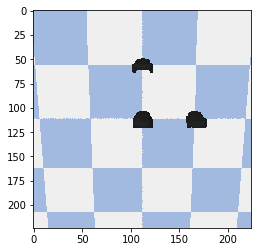

In [57]:
plt.imshow(rgbImg)

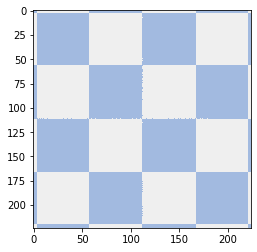

In [27]:
plt.imshow(rgbImg)

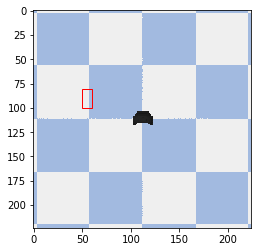

In [10]:
def plot_box(img, top_left, right_bot):
    fig, ax = plt.subplots(1)
    x, y = top_left
    w, h = right_bot[0] - x, right_bot[1] - y
    
    rect = patches.Rectangle((x, y), w, h,linewidth=1,edgecolor='r',facecolor='none')
    ax.imshow(img)
    ax.add_patch(rect)
    plt.show()
plot_box(rgbImg, (50, 80), (60, 100))

[[ 1.          0.         -0.          0.        ]
 [-0.          0.98058069  0.19611613  0.        ]
 [ 0.         -0.19611613  0.98058069  0.        ]
 [-0.         -0.         -5.09901953  1.        ]]
[[ 2.41421342  0.          0.          0.        ]
 [ 0.          2.41421342  0.          0.        ]
 [ 0.          0.         -1.00000203 -1.        ]
 [ 0.          0.         -0.20000021  0.        ]]
[ 1.          0.         -5.09901953  1.        ]
[2.41421342 0.         4.89902965 5.09901953]
167.19295090658858 112.0


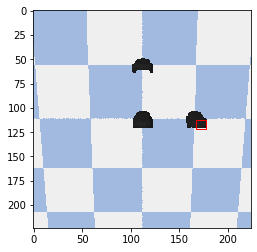

In [60]:
def test(xyz, viewMatrix, projectionMatrix):
    xyz = np.concatenate([xyz, np.array([1.])])
    viewMatrix = np.array(viewMatrix).reshape(4, 4)
#     viewMatrix = np.linalg.inv(viewMatrix)
    projectionMatrix = np.array(projectionMatrix).reshape(4, 4)
    print(viewMatrix)
    print(projectionMatrix)
    xyz = np.dot(xyz, viewMatrix)
    print(xyz)
    xyz = np.dot(xyz, projectionMatrix)
    print(xyz)
    u, v, z = xyz[:3]
#     u = u / z * 224 + 224 / 2
#     v = (1 - v / z) * 224 - 224/ 2
    u = u / z * 224 / 2 + 224 / 2
    v = (1 - v / z) * 224 / 2
    print(u, v)
    plot_box(rgbImg, (u, v), (u+10, v+10))

test(np.array([1, 0, 0.]), viewMatrix, projectionMatrix)

In [38]:
# p.loadURDF('./shrunk_random_urdfs/000/000.urdf', basePosition=[0, 0, 0])
file_path = '/home/tony/datasets/ShapeNet_subset/car/10555502fa7b3027283ffcfc40c29975/models/model_normalized.obj'
visualShapeId = p.createVisualShape(
    shapeType=p.GEOM_MESH,
    fileName=file_path,
    rgbaColor=None,
    meshScale=[1, 1, 1])
collisionShapeId = p.createCollisionShape(
    shapeType=p.GEOM_MESH,
    fileName=file_path,
    meshScale=[1, 1, 1])
multiBodyId = p.createMultiBody(
    baseMass=1.0,
    baseCollisionShapeIndex=collisionShapeId, 
    baseVisualShapeIndex=visualShapeId,
    basePosition=[0, 1, 0],
    baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))